# Pendulum Simulation

## Intro
In this exercise, we would like to visualize the motion of a pendulum. Equation of motion of a pendulum is one of the most classical problems in dynamics and control theory. 

![alt text](https://drive.google.com/uc?id=1dnBCEAa5sw6trE-vouU4pxviigCm8POh)

Under some mild assumptions, the equation of the motion of a pendulum is governed by a the following equation:

$$ ml^2 \alpha = m gl\sin \theta + T - c \omega$$

here $m$ is the mass of the pendulum, $l$ is the length, $g$ is the gravitational acceleration and $c$ is the drag coefficient. $\theta$ is the angle that pendulum makes with upward vertical axis, $\omega$ is the anular velocity and $\alpha$ is the angular acceleration, and they are all functions of time $t$. For those of you familiar with derivatives, $\omega$ and $\alpha$ are the first and second derivatives of $\theta$ with respect to time $t$, respectively:

$$\omega = \frac{\mathrm{d} \theta}{\mathrm{d} t}, ~~~~ \alpha = \frac{\mathrm{d}^2 \theta}{\mathrm{d} t^2} \tag{1}$$ 

We assume the pendulum is actuated with a motor that exerts a torque $T$. More advance topics of control theory involve finding a profile of $T$ as a function of time that can produce certain behavior, e.g. keep the pendulum inverted; see [this](https://www.youtube.com/watch?v=5oGYCxkgnHQ).

Equation (1) is complex and we are NOT interested in using this equation. Instead, we will use a set of simpler equations that can **approximate** the original equations. In this approach, instead of having time as a continuous variable, we think of time as a discrete quantity. To better explain this, imagine that we start with some initial angle $\theta_0$ and initial angular velocity $\omega_0$ at time step 0. Every $\Delta t$ seconds, we will update the angle and angular velocity. For example $\theta_0 = \pi/3$ (radian) and $\omega_0 = 0 ~~$ (per second), and $\Delta t=0.1$ s. Of course, the smaller $\Delta t$, more accurate is our approaximation. 

The two following equations prescribe how to update the pendulum angle and angular velocity. 

$$ \theta_n = \theta_{n-1} + \Delta t \omega_{n-1} \tag{2}$$
$$ \omega_n = \omega_{n-1} + \frac{\Delta t}{ml^2} \left(m g l \sin \theta_{n-1} + T_{n-1} - c \omega_{n-1}\right) \tag{3}$$

In above equation, $\theta_{n-1}$ and $\omega_{n-1}$ are the values of the pendulum angle and angular velocity at time step $n-1$. $T_{n-1}$ is the profile of motor torque at time step $n-1$. If you are interested to know more about how equations 2-3 are approximation of equation 1, read about [Euler integration](https://en.wikipedia.org/wiki/Euler_method) .

## Implementation
### Parameter values
For the examples below, we will consider a pendulum with mass 0.1 kg, length 0.5 m. The gravitational acceleration is 9.8 m/s$^2$, and drag coefficient is 0.1 N.s. we will assume $T_{n} = 0.1$ for all $n \geq 0$; i.e. there is a constant torque of 0.1 N.m exerted by the motor at all times. Take $\Delta t = 0.05$ s. 

In [2]:
#enter the parameter values as specified above
m =  0.1
l =  0.5
g =  9.8
c =  0.1
Tn =  0.1
dt =  0.05

### Update function
Write a function that updates values of $\theta$ and $\omega$ given the old values, using the equations 2-3

In [3]:
from math import sin, cos, pi, isclose
def update_pendulum(theta_old, omega_old, torque_old):
  """
  update parameters theta and omega.
  inputs:
  params: theta_old, value of theta at timestep n-1.
  params: omega_old, value of omega at timestep n-1.
  params: torque_old, value of torque at timestep n-1.
  
  returns:
  theta: value of theta at timestep n.
  omega: value of theta at timestep n.
  """

  theta =  theta_old + dt * omega_old
  temp = m * g *l * sin(theta_old) + torque_old - c * omega_old
  omega =  omega_old + temp * dt / ( m * l ** 2)
  return theta, omega

In [4]:
# check your implementation here

assert update_pendulum(0, 1, 1) == (0.05, 2.8), "update_pendulum is not correct."
t1, t2 = update_pendulum(1, 0, 1)
assert t1 == 1.0, "update_pendulum is not correct."
assert isclose(t2, 2.8246415651117385), "update_pendulum is not correct."

print("update_pendulum is correct.")

update_pendulum is correct.


### run simulation
starting from timestep 0 (`n=0`) write a function that iterates for `n_end` many time steps, update `theta` and `omega`. Keep a record of these value for future visualization. Remember we assume the torque $T$ is constant and equation to `Tn = 0.1` N.m

In [5]:
def run_pendulum(theta_0, omega_0, n_end):
  """
  start from variables at timestep 0 and simulate pendulum for n_end timesteps.
  inputs:
  params: theta_0, value of theta at timestep 0.
  params: omega_0, value of omega at timestep 0.
  params: n_end, number of time steps for simulation
  
  returns:
  theta_vec: a list of all theta values (should have n+1 entries)
  omega_vec: a list of all omega values (should have n+1 entries)
  """
  theta_vec = [theta_0]
  omega_vec = [omega_0]
  for i in range(n_end):
    theta, omega = update_pendulum(theta_vec[i], omega_vec[i], Tn)
    theta_vec.append(theta)
    omega_vec.append(omega)
  return theta_vec, omega_vec

In [6]:
# check your implementation here
t1, t2 = run_pendulum(0, 0, 3)
assert isclose(t1[2], 0.01), "run_pendulum is not correct."
assert isclose(t1[3], 0.028), "run_pendulum is not correct."
assert isclose(t2[2], 0.36), "run_pendulum is not correct."
assert isclose(t2[3], 0.49779983666748334), "run_pendulum is not correct."

print("run_pendulum is correct.")

run_pendulum is correct.


# visualize simulations
Now it is time to visualize the simulations. For all simulations, we assume one side of the pendulum is fixed (pivotted) at $(0, 0)$. The coordinates of the other side of the pendulum is given by $(x, y) = (-l\sin\theta, l\cos \theta ) $. You can use the value of $\theta$ at any timestep, find the coordinate of the end of the pendulum, and then plot it. 

The goal is to prepare something similar to Figure x. Remember to set the x- and y-axis to be in $[-1.1\times l, 1.1 \times l]$. Also make sure both axis are equal. What command can you use to make the axis equal?

With `theta_0=1/2, omega_0=0` and `n_end=20`, run `run_pendulum` function. Then plot the pendulum at `n=[0, 5, 10, 15]`. You should get a picture similar to the one below. 

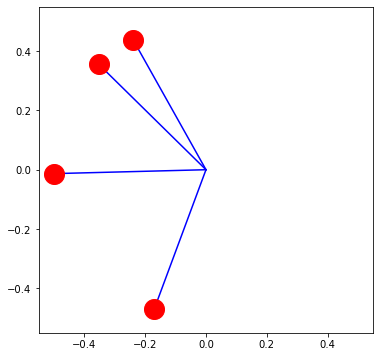

In [7]:
import matplotlib.pyplot as plt


theta_vec, omega_vec = run_pendulum(0.5, 0, 20)
plt.figure(figsize=(6,6))

for n in [0, 5, 10, 15]:
  # complete this line
  x = -1*l*sin(theta_vec[n])
  y = l*cos(theta_vec[n])
  plt.ylim(-1.1*l, 1.1*l)
  plt.xlim(-1.1*l, 1.1*l)
  plt.plot(x, y, 'k', linewidth=2)
  plt.plot([x,0],[y,0], color='blue')
  plt.plot(x, y, marker='o', markersize=20, markerfacecolor='r', markeredgecolor='r')

# make axis equation
# set x-axis limits
# set y-axis limits

# Animation in Google Colab

Perhaps more exciting than a single picture is an animation that fully shows how the pendulum moves. 

To help you work on this, I set up a simpler example. Use this example to prepare an animation for the pendulum example. In my simpler example, I animate a square that moves from $(0,0)$ diagonally to $(1,1)$; See below. 

![alt text](https://drive.google.com/uc?id=1l3tpepM--9WfgjboVMeAkI5-KttWGrWE)

To begin a figure window, we use

`plt.figure(figsize=(6,6))` 

where the size of the figure window is determined by `figsize`. This will create a square figure. Notice that a figure can have multiple axes. Only one of these axes is active at any given time. `plt.gca` gives you a handle to this axes. 

`ax = plt.gca()`

On any of the axis of a figure, we can visualize multiple set of data using commands like `plot` or `scatter`. For example, 

`plot1 = ax.plot(0, 0, marker='s', markersize=20, markerfacecolor='red')`

Here `plot1` is a handle to that particular plot. We will use this handle to change the plot.

(-1.0, 1.0)

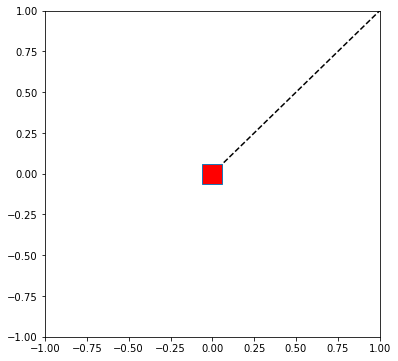

In [8]:
# import the matplotlib library
import matplotlib.pyplot as plt

# setup a figure.
fig = plt.figure(figsize=(6,6)) #
ax = plt.gca()
plot0, = ax.plot([0,1], [0,1], "k--") # plot the dashed line
plot1, = ax.plot(0, 0, marker='s', markersize=20, markerfacecolor='red') # plot the red square
plt.xlim((-1,1))
plt.ylim((-1,1))


To construct an animation, we need to create a function that tells `matplotlib` how every frame of the animation should be constructed. notice that `plot0` which is the dashed line does not change between frames. However the red square moves along the line $y=x$. Lets assume between any two frame, $x$ changes only by $0.01$. The following function does this update:

In [9]:
def update(i):
  x = plot1.get_xdata()    # get the curent x value
  plot1.set_xdata(x+0.01)  # update x value
  plot1.set_ydata(x+0.01)  # update y value. remember y = x in our example. 
  return plot1

Finally we pass the figure handle and the update function to `matplotlib.animation.FuncAnimation` to get an animation

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# from matplotlib import cm
# import matplotlib.pyplot as plt
#ax.plot([0, 1], [0, 1], "k--")


anim = FuncAnimation(fig, update, frames=range(0, 100), interval=100, repeat=True)
HTML(anim.to_html5_video())

Use a similar procedure to prdouce animation of the pendulum motion. 

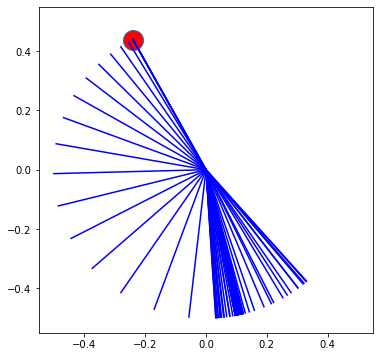

In [11]:
def update2(i):
  x = -1 * l * sin(theta_vec[i])
  y = l * cos(theta_vec[i])
  plot1.set_xdata(x)
  plot1.set_ydata(y)
  plt.plot([x,0], [y,0], color = 'blue')
  return plot1, plot0

theta_vec, omega_vec = run_pendulum(0.5, 0, 100)
x = -1*l*sin(theta_vec[0])
y = l*cos(theta_vec[0])
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
plot0 = ax.plot([x,0],[y,0], color='blue')
plot1, = ax.plot(x, y, marker='o', markersize=20, markerfacecolor='red')
plt.xlim((-1.1 *l, 1.1 *l))
plt.ylim((-1.1 *l, 1.1 *l))

anim = FuncAnimation(fig, update2, frames=range(0, 100), interval=100, repeat=True, blit=True )
HTML(anim.to_html5_video())


Here are some examples you can compare your animations with. 


![alt text](https://drive.google.com/uc?id=1YMCvu0IBt6JZcOM5HpWlbsky83sT-X6F)

![alt text](https://drive.google.com/uc?id=1NAya-9C3k04yhg0AfluK4B7-qQsQ15U5)